<a href="https://colab.research.google.com/github/SenorFoca/High-Frecuency-Trading/blob/main/HFT_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


# A) Data download and visualization

In [2]:
# Define the stock ticker symbols for the pair of assets to analyze
ticker1 = "V"   # Visa
ticker2 = "MA"  # Mastercard

# Define the start and end dates for downloading high-frequency data
start_date = "2025-01-23"  # Start date for data collection
end_date = "2025-01-24"    # End date (one day later to capture a full day's trading data)

# Download stock price data (1-minute interval) for Visa
stock1 = yf.download(ticker1, start=start_date, end=end_date, interval="1m")

# Download stock price data (1-minute interval) for Mastercard
stock2 = yf.download(ticker2, start=start_date, end=end_date, interval="1m")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Combine the two dataframes based on the Datetime index
# We extract only 'Open' and 'Close' prices from both stock datasets and merge them into one dataframe
combined_df = pd.concat(
    [stock1[['Open', 'Close']], stock2[['Open', 'Close']]],
    axis=1,  # Merge columns side-by-side
    keys=['Stock1', 'Stock2']  # Assign hierarchical keys for column names
)

# Forward fill missing values to handle cases where timestamps are missing in either dataset
# This ensures that if one stock has missing data at a specific timestamp, it gets filled with the last available value
combined_df = combined_df.ffill()

# Rename columns for better readability and clarity
combined_df.columns = ['Visa_Open', 'Visa_Close', 'Mastercard_Open', 'Mastercard_Close']

# Display the final combined dataframe
print(combined_df)

                            Visa_Open  Visa_Close  Mastercard_Open  \
Datetime                                                             
2025-01-23 14:30:00+00:00  323.760010  323.769989       529.049988   
2025-01-23 14:31:00+00:00  323.785004  323.859985       529.289978   
2025-01-23 14:32:00+00:00  323.950012  324.424988       530.390015   
2025-01-23 14:33:00+00:00  324.424988  324.630005       530.799988   
2025-01-23 14:34:00+00:00  324.690002  324.975006       531.200012   
...                               ...         ...              ...   
2025-01-23 20:55:00+00:00  327.489990  327.795013       533.195007   
2025-01-23 20:56:00+00:00  327.799988  328.130005       533.760010   
2025-01-23 20:57:00+00:00  328.125000  328.100006       533.885010   
2025-01-23 20:58:00+00:00  328.049988  328.130005       533.844971   
2025-01-23 20:59:00+00:00  328.125000  328.100006       533.830017   

                           Mastercard_Close  
Datetime                                   

In [4]:
# Calculate the number of data points (rows) for Visa
visa_length = len(stock1)

# Calculate the number of data points (rows) for Mastercard
mastercard_length = len(stock2)  # Fixed: should be stock2 instead of stock1

# Print the number of data points for each asset
print("Visa (V) data length:", visa_length)
print("Mastercard (MA) data length:", mastercard_length)

# Check if both assets have the same number of data points
if visa_length == mastercard_length:
    print("\nThe assets have the same length")
else:
    print("\nThe assets have different lengths")

Visa (V) data length: 389
Mastercard (MA) data length: 384

The assets have different lengths


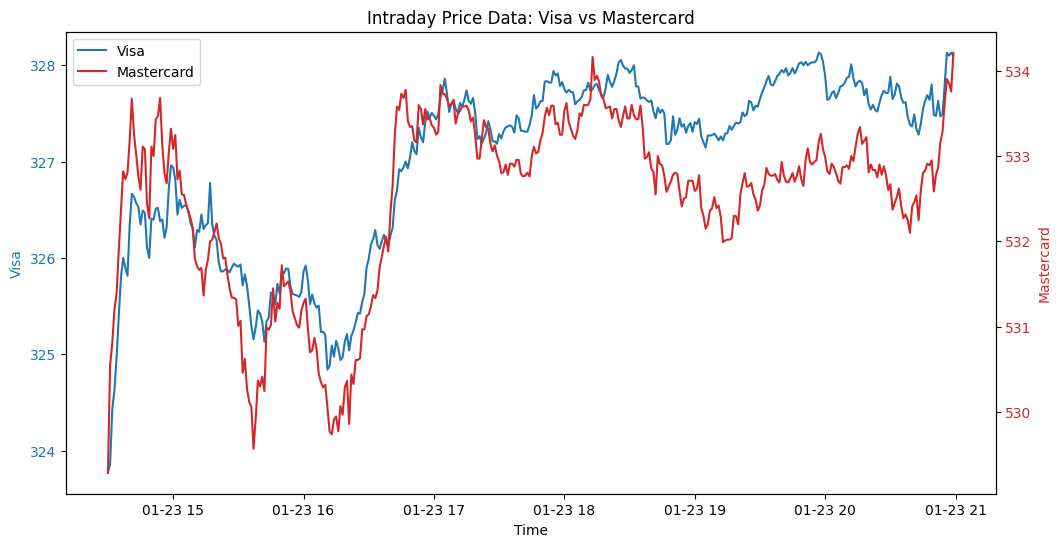

In [5]:
# Plotting the intraday close prices for Visa and Mastercard
fig, ax1 = plt.subplots(figsize=(12, 6))

color_visa = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Visa', color=color_visa)
ax1.plot(combined_df.index, combined_df['Visa_Close'], color=color_visa, label='Visa')
ax1.tick_params(axis='y', labelcolor=color_visa)

ax2 = ax1.twinx()
color_mastercard = 'tab:red'
ax2.set_ylabel('Mastercard', color=color_mastercard)
ax2.plot(combined_df.index, combined_df['Mastercard_Close'], color=color_mastercard, label='Mastercard')
ax2.tick_params(axis='y', labelcolor=color_mastercard)

lines_visa, labels_visa = ax1.get_legend_handles_labels()
lines_mastercard, labels_mastercard = ax2.get_legend_handles_labels()
ax1.legend(lines_visa + lines_mastercard, labels_visa + labels_mastercard, loc='upper left')

plt.title("Intraday Price Data: Visa vs Mastercard")
plt.show()

In [6]:
from statsmodels.tsa.stattools import coint  # Import the cointegration test function

# Extract the closing prices of Visa and Mastercard
p1 = combined_df['Visa_Close']
p2 = combined_df['Mastercard_Close']

# Perform the Engle-Granger cointegration test
score, p_value, _ = coint(p1, p2)

# Print the p-value to determine whether the pair is cointegrated
print(f'Engle-Granger cointegration test p-value: {p_value}')

Engle-Granger cointegration test p-value: 0.05987843779794051


# B) Rho

In [7]:
# Extract the first opening price of Visa and Mastercard
S1_0 = combined_df['Visa_Open'][0]  # Initial price of Visa at market open
S2_0 = combined_df['Mastercard_Open'][0]  # Initial price of Mastercard at market open

# Calculate log returns for Visa and Mastercard
# Log return formula: log(P_t / P_t-1), which measures percentage price change over time
r1 = np.log(combined_df['Visa_Close'] / combined_df['Visa_Close'].shift(1))
r2 = np.log(combined_df['Mastercard_Close'] / combined_df['Mastercard_Close'].shift(1))

# Print initial opening prices
print("S1_0 = ", S1_0)
print("S2_0 = ", S2_0)


S1_0 =  323.760009765625
S2_0 =  529.0499877929688


<ipython-input-7-e4acf72d69cc>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S1_0 = combined_df['Visa_Open'][0]  # Initial price of Visa at market open
<ipython-input-7-e4acf72d69cc>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S2_0 = combined_df['Mastercard_Open'][0]  # Initial price of Mastercard at market open


In [8]:
# Calculate the Pearson correlation coefficient (rho) between the log returns of both assets
rho = r1.corr(r2)

# Print the computed correlation coefficient (rho) rounded to 4 decimal places
print(f"rho = {rho:.4f}")


rho = 0.5643


# C) Beta

In [9]:
from scipy.stats import linregress  # Import linear regression function

# Perform linear regression on the log-transformed closing prices of Visa and Mastercard
result = linregress(np.log(combined_df['Visa_Close']), np.log(combined_df['Mastercard_Close']))

# Extract the beta coefficient (slope) from the regression result
beta = result.slope

# Print the computed beta value rounded to 4 decimal places
print(f"Beta = {beta:.4f}")

Beta = 0.5651


# D) S, μ and σ

In [10]:
# Calculate the expected daily return (mu) for Visa and Mastercard
# Multiply by 390 to annualize, assuming 390 trading minutes per day
mu_1 = r1.mean() * 390  # Expected return for Visa
mu_2 = r2.mean() * 390  # Expected return for Mastercard

# Calculate the standard deviation (volatility) of returns for Visa and Mastercard
# Multiply by sqrt(390) to annualize, assuming 390 trading minutes per day
sigma_1 = r1.std() * np.sqrt(390)  # Volatility of Visa
sigma_2 = r2.std() * np.sqrt(390)  # Volatility of Mastercard

# Initial value of the portfolio cash process (if needed for further calculations)
z_0 = 0

# Print the computed values rounded to 4 decimal places
print(f"mu_1 = {mu_1:.4f}")
print(f"mu_2 = {mu_2:.4f}")
print(f"sigma_1 = {sigma_1:.4f}")
print(f"sigma_2 = {sigma_2:.4f}")

mu_1 = 0.0134
mu_2 = 0.0093
sigma_1 = 0.0078
sigma_2 = 0.0079


In [11]:
# Define key parameters for the trading model
gamma = 0.5  # Risk aversion parameter
delta = 1     # Control parameter for mean reversion
T = 1         # Time horizon (normalized to 1 day)
M = len(combined_df['Visa_Close'])  # Number of time steps (1-minute intervals)

In [12]:
# Compute time step size
dt = T / M  # Small time increment per step

# Initialize arrays to store simulated values
S1 = np.zeros((M + 1, 1))  # Stock price series for Visa
S2 = np.zeros((M + 1, 1))  # Stock price series for Mastercard
z = np.zeros((M + 1, 1))   # Optimal cash process

Pi_1 = np.zeros((M + 1, 1))  # Portfolio weight for asset 1
Pi_2 = np.zeros((M + 1, 1))  # Portfolio weight for asset 2

# Time array from 0 to T, split into M+1 intervals
tt = np.linspace(0, 1, M + 1)

# Initialize first values in arrays
z[0] = z_0   # Initial spread process
S1[0] = S1_0 # Initial stock price for Visa
S2[0] = S2_0 # Initial stock price for Mastercard

# Compute the combined volatility of the portfolio based on Visa and Mastercard
sigma_beta = np.sqrt(
    sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho
)

# Compute the optimal mean reversion level for the cash process
eta = (-1 / delta) * (mu_1 - sigma_1 ** 2 / 2 + beta * (mu_2 - sigma_2 ** 2 / 2))

# Generate random normal noise for the simulation
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape)
rn2 = np.random.standard_normal(S2.shape)

# Spread process
for t in range(1, M + 1):
    z[t] = z[t-1] * (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt) * (
        (sigma_1 + beta * sigma_2 * rho) / sigma_beta * rn1[t]
        + beta * (sigma_2 * np.sqrt(1 - rho ** 2) / sigma_beta) * rn1[t]
    )

    # Update stock prices with actual historical closing prices
    S1[t] = combined_df['Visa_Close'][t-1]
    S2[t] = combined_df['Mastercard_Close'][t-1]


<ipython-input-12-29c8524031dd>:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S1[t] = combined_df['Visa_Close'][t-1]
<ipython-input-12-29c8524031dd>:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  S2[t] = combined_df['Mastercard_Close'][t-1]


Text(0.5, 1.0, 'Stock Price')

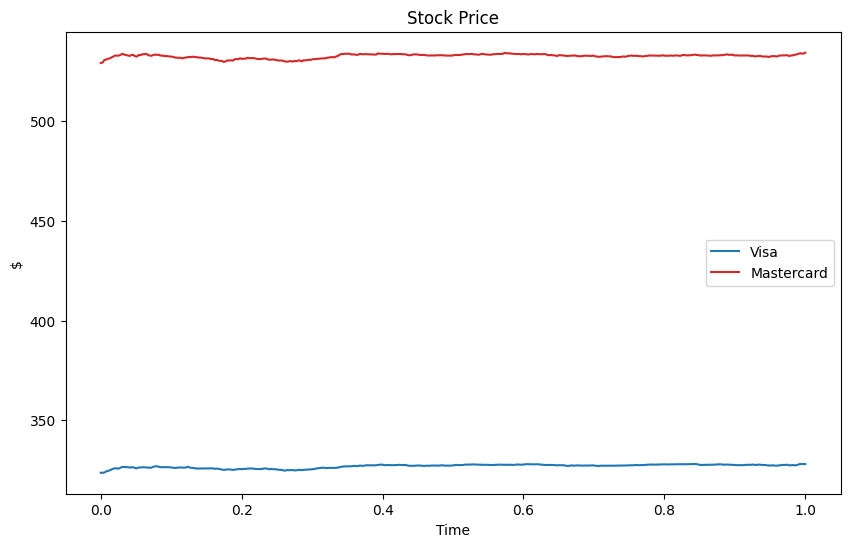

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'tab:blue', lw=1.5, label='Visa')
plt.plot(tt, S2, 'tab:red', lw=1.5, label='Mastercard')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

# E) Optimal trading weights

Text(0.5, 1.0, 'Cointegrated Vector (z)')

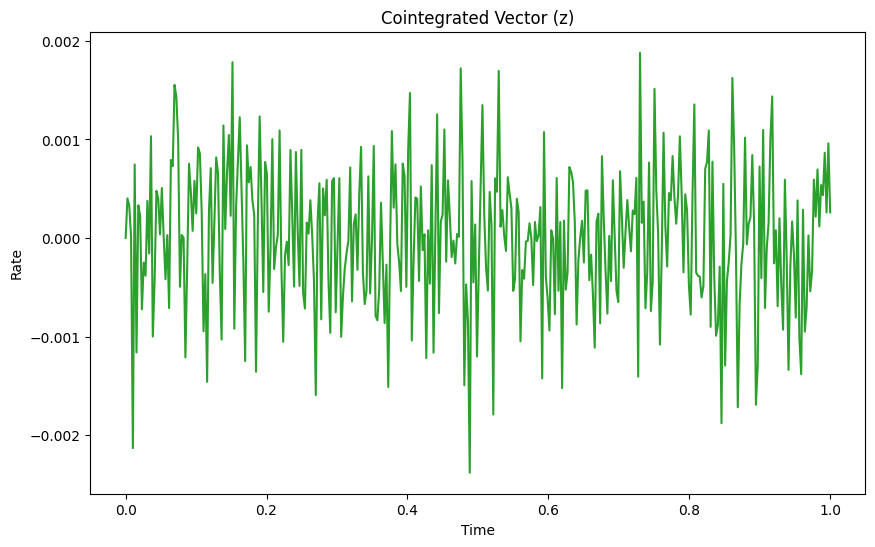

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'tab:green', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Cointegrated Vector (z)')

In [17]:
a = np.zeros((M + 1, 1))   # Control parameter
b = np.zeros((M + 1, 1))   # Control parameter
c = np.zeros((M + 1, 1))   # Control parameter

In [18]:
# Iterate through time steps to compute traiding weights
for t in range(1, M + 1):
    # Compute coefficient a[t] for optimal control
    a[t] = 0.5 * (T - t * dt) / ((1 - rho ** 2) * sigma_1 ** 2)

    # Compute coefficient b[t] for optimal control
    b[t] = -0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2) / ((1 - rho ** 2) * sigma_1 ** 2) \
           - rho * mu_2 * (T - t * dt) / ((1 - rho ** 2) * sigma_1 * sigma_2)

    # Compute coefficient c[t] for optimal control
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt) / ((1 - rho ** 2) * sigma_2 ** 2) \
           + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta * rho) * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2) \
           + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) \
           + (1 / 24) * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2 / ((1 - rho ** 2) * sigma_1 ** 2)

    # Compute optimal trading weight for Visa (Pi_1)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 ** 2) \
                             + delta / gamma * (-2 * a[t] * (mu_1 + delta * z[t]) - b[t]) \
                             - rho * mu_2 / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

    # Compute optimal traiding weight for Mastercard (Pi_2)
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) \
                             + delta * beta / gamma * (-2 * a[t] * (mu_1 + delta * z[t]) - b[t]) \
                             - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))


In [19]:
print(f'pi 1: {Pi_1.mean()}')
print(f'pi 2: {Pi_2.mean()}')

pi 1: 0.6042881196064415
pi 2: -0.0665380041502278


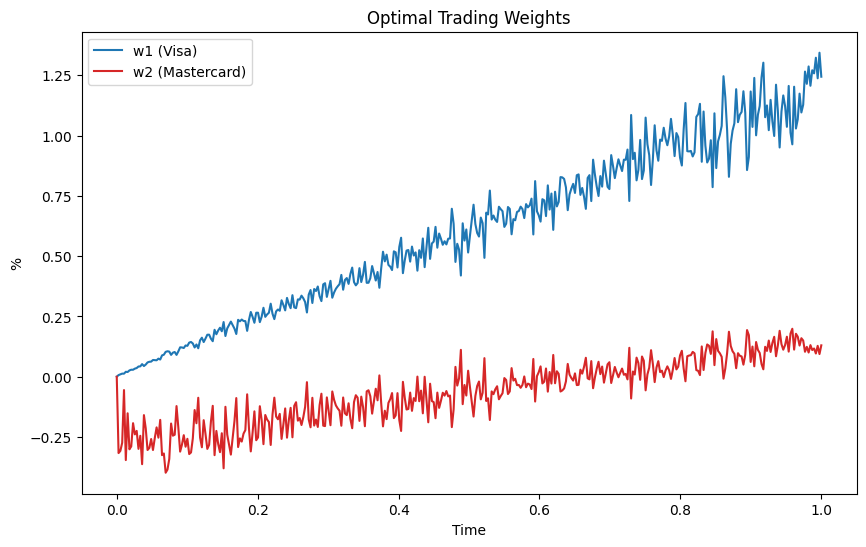

In [20]:
# Plot the optimal trading weights over time
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'tab:blue', lw=1.5, label='w1 (Visa)')
plt.plot(tt, Pi_2, 'tab:red', lw=1.5, label='w2 (Mastercard)')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Optimal Trading Weights')

plt.show()

# F) Optimal cash process and wealth

Text(0.5, 1.0, 'Cash')

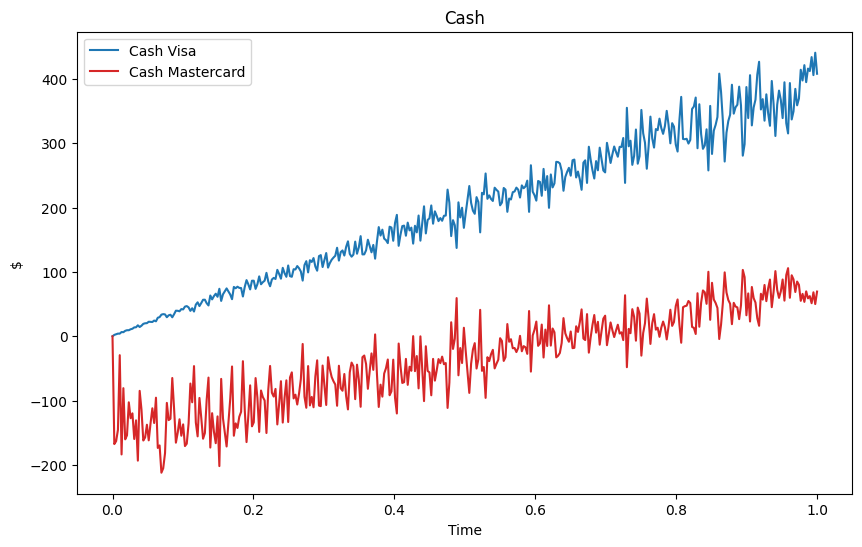

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'tab:blue', lw=1.5, label='Cash Visa')
plt.plot(tt, Pi_2 * S2, 'tab:red', lw=1.5, label='Cash Mastercard')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

Text(0.5, 1.0, 'Wealth')

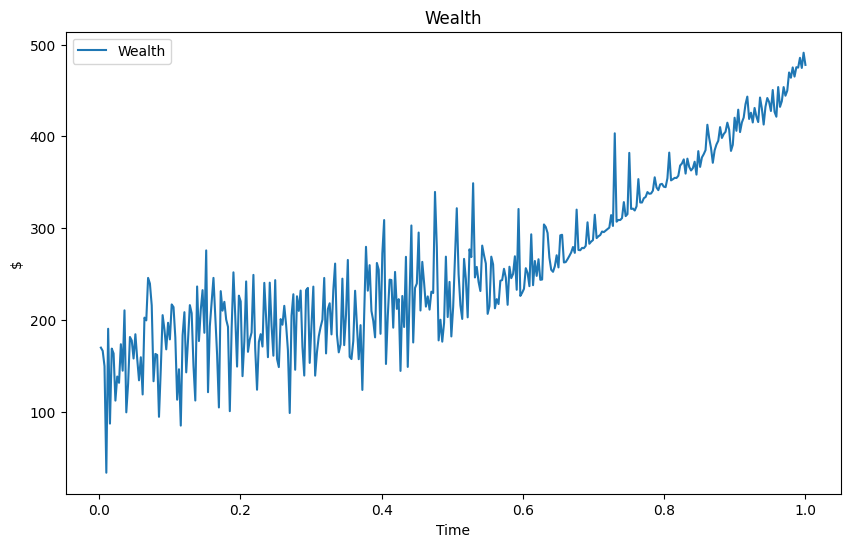

In [22]:
wealth = abs(Pi_1*S1)+abs(Pi_2*S2)

plt.figure(figsize=(10, 6))
plt.plot(tt[1:], wealth[1:], 'tab:blue', lw=1.5, label='Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

# G) Dynamic vs static strategy

Text(0.5, 1.0, 'Comparison Dynamic vs Static')

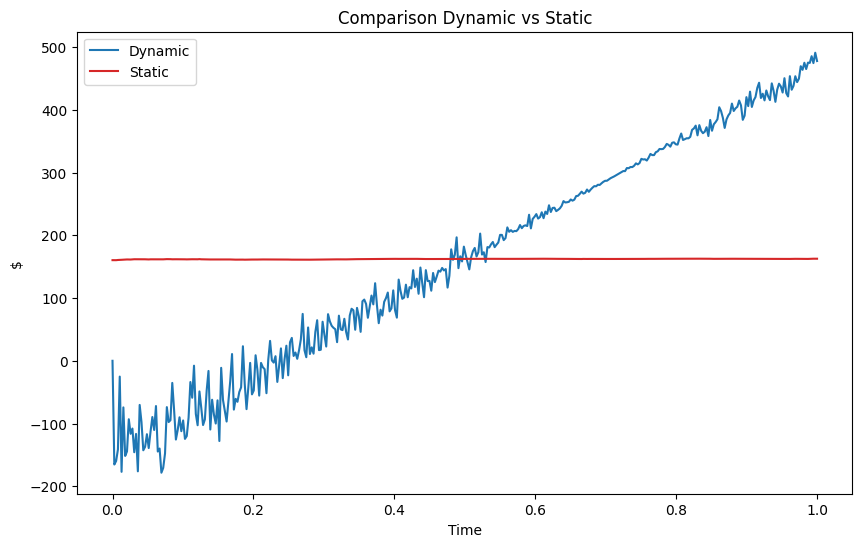

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'tab:blue', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'tab:red', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison Dynamic vs Static')

In [41]:
#Initial values for simulation
print("Initial Values for the Simulation:")

# Initial price of Visa
print(f"S1_0 =    {S1_0:.4f}")
# Initial price of Mastercad
print(f"S2_0 =    {S2_0:.4f}")
# Correlation coefficient (rho)
print(f"rho =     {rho:.4f}")
# Cointegration slope (beta)
print(f"beta =    {beta:.4f}")
# Expected returns (mu)
print(f"mu_1 =    {mu_1:.4f}")
print(f"mu_2 =    {mu_2:.4f}")
#Volatility (sigma)
print(f"sigma_1 = {sigma_1:.4f}")
print(f"sigma_2 = {sigma_2:.4f}")
# Risk aversion parameter (gamma)
print(f"gamma =   {gamma}")
# Mean reversion (delta)
print(f"delta =   {delta}")
# Total time horizon (T)
print(f"T =       {T}")
# Number of discrete time steps (M)
print(f"M =       {390}")
# Initial value of the cointegrating spread (z_0)
print(f"z_0 =     {0}")

Initial Values for the Simulation:
S1_0 =    323.7600
S2_0 =    529.0500
rho =     0.5643
beta =    0.5651
mu_1 =    0.0134
mu_2 =    0.0093
sigma_1 = 0.0078
sigma_2 = 0.0079
gamma =   0.5
delta =   1
T =       1
M =       390
z_0 =     0
